In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import os
import glob
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import time
from sklearn.pipeline import Pipeline

In [1]:
train=pd.DataFrame()
os.chdir("C:\\Users\\Andrius\\Downloads\\Mouse-Dynamics-Challenge-master\\Mouse-Dynamics-Challenge-master\\training_files")
for user in os.listdir():
    os.chdir(str(user))
    for session in os.listdir():
        temp=pd.read_csv(session)
        temp['session']=session
        temp['user']=user
        train=train.append(temp)
    os.chdir("C:\\Users\\Andrius\\Downloads\\Mouse-Dynamics-Challenge-master\\Mouse-Dynamics-Challenge-master\\training_files")
    
    
test=pd.DataFrame()
os.chdir("C:\\Users\\Andrius\\Downloads\\Mouse-Dynamics-Challenge-master\\Mouse-Dynamics-Challenge-master\\test_files")
for user in os.listdir():
    os.chdir(str(user))
    for session in os.listdir():
        temp=pd.read_csv(session)
        temp['session']=session
        temp['user']=user
        test=test.append(temp)
    os.chdir("C:\\Users\\Andrius\\Downloads\\Mouse-Dynamics-Challenge-master\\Mouse-Dynamics-Challenge-master\\test_files")
    
os.chdir("C:\\Users\\Andrius\\Downloads\\Mouse-Dynamics-Challenge-master\\Mouse-Dynamics-Challenge-master")
labels=pd.read_csv("public_labels.csv")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Andrius\anaconda\envs\data analysis\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-c8eed37bd70e>", line 1, in <module>
    train=pd.DataFrame()
NameError: name 'pd' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Andrius\anaconda\envs\data analysis\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Andrius\anaconda\envs\data analysis\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File

TypeError: object of type 'NoneType' has no len()

In [2]:

os.chdir("C:\\Users\\Andrius\\Downloads\\Mouse-Dynamics-Challenge-master\\Mouse-Dynamics-Challenge-master")
train.to_csv('train.csv')
train.to_csv('test.csv')

NameError: name 'train' is not defined

In [2]:
os.chdir("C:\\Users\\Andrius\\Downloads\\Mouse-Dynamics-Challenge-master\\Mouse-Dynamics-Challenge-master")
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
labels=pd.read_csv("public_labels.csv")

In [3]:
test

,Unnamed: 0,record timestamp,client timestamp,button,state,x,y,session,user
0,0,0.000,0.000,NoButton,Move,1043,410,session_2144641057,user12
1,1,0.232,0.094,NoButton,Move,1024,410,session_2144641057,user12
2,2,0.232,0.094,NoButton,Move,1019,410,session_2144641057,user12
3,3,0.232,0.234,NoButton,Move,979,409,session_2144641057,user12
4,4,0.342,0.234,NoButton,Move,974,411,session_2144641057,user12
...,...,...,...,...,...,...,...,...,...
2253811,56512,3330.383,3330.278,NoButton,Move,721,268,session_8764610836,user9
2253812,56513,3330.383,3330.294,NoButton,Move,722,268,session_8764610836,user9
2253813,56514,3330.383,3330.294,NoButton,Move,722,267,session_8764610836,user9
2253814,56515,3330.383,3330.403,Left,Pressed,722,267,session_8764610836,user9


In [4]:
labels.rename(columns = {'filename': 'session'}, inplace = True)

In [5]:
labels

,session,is_illegal
0,session_0003960194,1
1,session_0005840196,0
2,session_0025450757,0
3,session_0029922803,0
4,session_0064281061,1
...,...,...
811,session_9938110038,0
812,session_9951071945,1
813,session_9956793065,0
814,session_9973193301,0


## EDA

In [6]:
train

,Unnamed: 0,record timestamp,client timestamp,button,state,x,y,session,user
0,0,0.000,0.000,NoButton,Move,1043,410,session_2144641057,user12
1,1,0.232,0.094,NoButton,Move,1024,410,session_2144641057,user12
2,2,0.232,0.094,NoButton,Move,1019,410,session_2144641057,user12
3,3,0.232,0.234,NoButton,Move,979,409,session_2144641057,user12
4,4,0.342,0.234,NoButton,Move,974,411,session_2144641057,user12
...,...,...,...,...,...,...,...,...,...
2253811,56512,3330.383,3330.278,NoButton,Move,721,268,session_8764610836,user9
2253812,56513,3330.383,3330.294,NoButton,Move,722,268,session_8764610836,user9
2253813,56514,3330.383,3330.294,NoButton,Move,722,267,session_8764610836,user9
2253814,56515,3330.383,3330.403,Left,Pressed,722,267,session_8764610836,user9


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253816 entries, 0 to 2253815
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   record timestamp  float64
 2   client timestamp  float64
 3   button            object 
 4   state             object 
 5   x                 int64  
 6   y                 int64  
 7   session           object 
 8   user              object 
dtypes: float64(2), int64(3), object(4)
memory usage: 154.8+ MB


In [8]:
train.duplicated().value_counts()

False    2253816
dtype: int64

In [9]:
train.drop_duplicates(inplace=True)

In [10]:
train.duplicated().value_counts()

False    2253816
dtype: int64

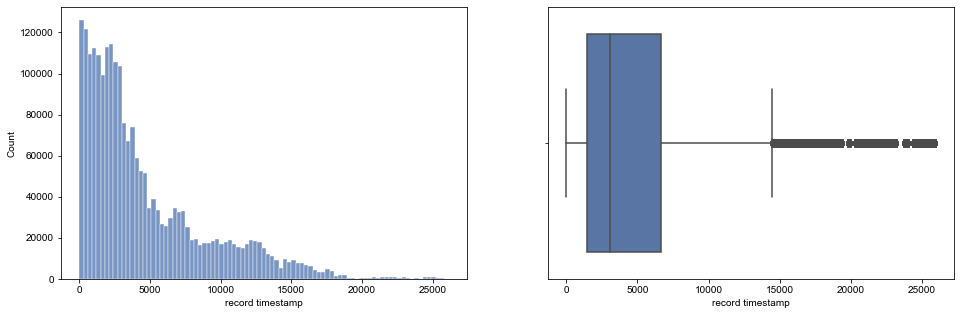

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 5))


sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.histplot(x=train['record timestamp'],ax=axes[0],binwidth=300)

#axes[0].set(xlim=(df_num[feature].min(axis=0)))
sns.boxplot(ax=axes[1], x=train['record timestamp']);

In [12]:
train['record timestamp'].describe()

count    2.253816e+06
mean     4.619372e+03
std      4.343933e+03
min      0.000000e+00
25%      1.455894e+03
50%      3.047399e+03
75%      6.654434e+03
max      2.594902e+04
Name: record timestamp, dtype: float64

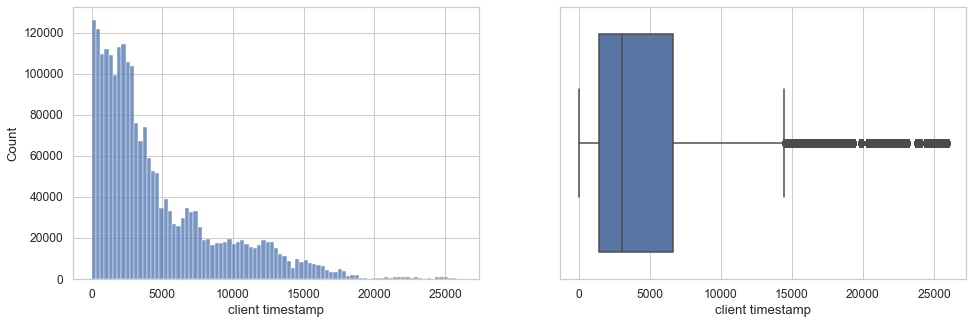

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 5))


sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.histplot(x=train['client timestamp'],ax=axes[0],binwidth=300)

#axes[0].set(xlim=(df_num[feature].min(axis=0)))
sns.boxplot(ax=axes[1], x=train['client timestamp']);

Muito parecido as duas ultimas features. Skew positivo com vários outliners.

In [14]:
train['client timestamp'].describe()

count    2.253816e+06
mean     4.619259e+03
std      4.343914e+03
min      0.000000e+00
25%      1.455910e+03
50%      3.047332e+03
75%      6.654367e+03
max      2.594914e+04
Name: client timestamp, dtype: float64

[(0.0, 68811.75)]

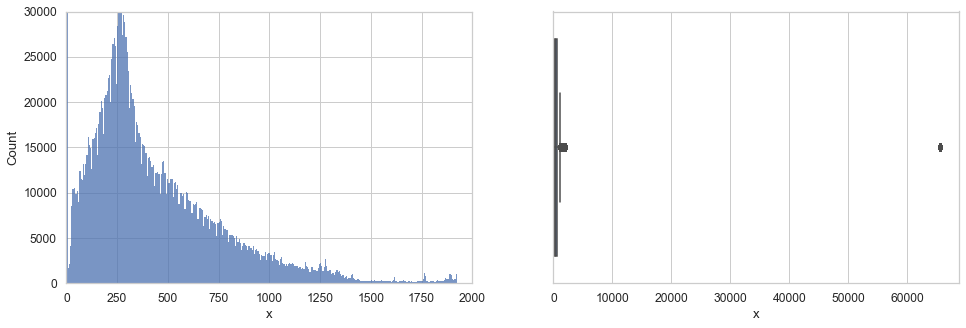

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 5))


sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.histplot(x=train['x'],ax=axes[0])

axes[0].set(xlim=(train['x'].min(),2000),ylim=(0,30000))
sns.boxplot(ax=axes[1], x=train['x']);
axes[1].set(xlim=(train['x'].min()))

In [16]:
train['x'].describe()

count    2.253816e+06
mean     4.283241e+02
std      5.095299e+02
min      0.000000e+00
25%      2.050000e+02
50%      3.280000e+02
75%      5.860000e+02
max      6.553500e+04
Name: x, dtype: float64

In [17]:
train=train[train['x']<10000]

[(0.0, 1132.95)]

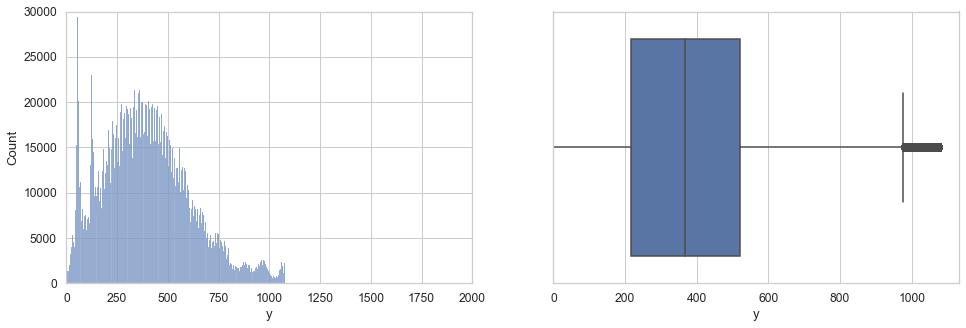

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 5))


sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.histplot(x=train['y'],ax=axes[0])

axes[0].set(xlim=(train['y'].min(),2000),ylim=(0,30000))
sns.boxplot(ax=axes[1], x=train['y']);
axes[1].set(xlim=(train['y'].min()))

In [19]:
train['y'].describe()

count    2.253736e+06
mean     3.796335e+02
std      2.268225e+02
min      0.000000e+00
25%      2.160000e+02
50%      3.680000e+02
75%      5.200000e+02
max      1.079000e+03
Name: y, dtype: float64

<AxesSubplot:xlabel='button', ylabel='count'>

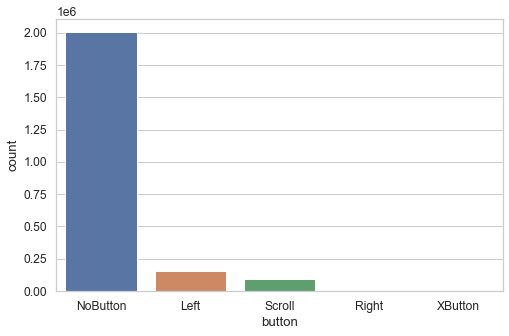

In [20]:
sns.countplot(x=train['button'])

In [21]:
train['button'].value_counts()

NoButton    2006284
Left         151048
Scroll        95496
Right           906
XButton           2
Name: button, dtype: int64

Q porra de XButton é esse?

In [22]:
train[train['button']=='XButton']

,Unnamed: 0,record timestamp,client timestamp,button,state,x,y,session,user
390488,11423,12268.450,12268.512,XButton,Pressed,1120,334,session_8848361933,user15
390492,11427,12268.834,12268.902,XButton,Released,1203,365,session_8848361933,user15


<AxesSubplot:xlabel='state', ylabel='count'>

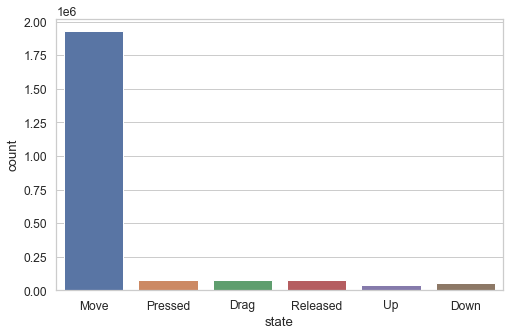

In [23]:
sns.countplot(x=train['state'])

In [24]:
train['state'].value_counts()

Move        1926891
Drag          79393
Pressed       75978
Released      75978
Down          55303
Up            40193
Name: state, dtype: int64

<AxesSubplot:xlabel='user', ylabel='count'>

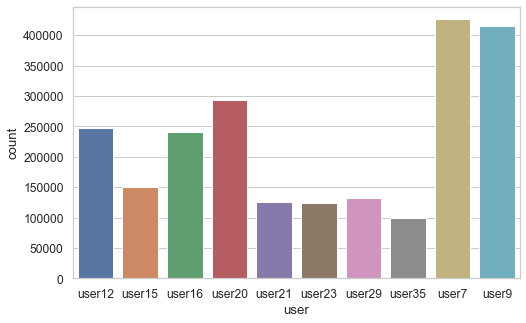

In [25]:
sns.countplot(x=train['user'])

<AxesSubplot:xlabel='session', ylabel='count'>

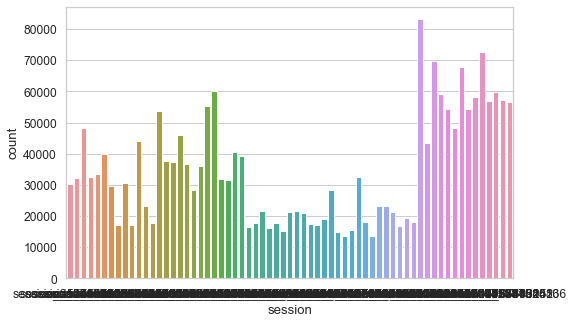

In [26]:
sns.countplot(x=train['session'])

In [29]:
def action_row(row):
    if row['state']=='Released' and row['state_lag']=='Drag':
        return 'DD'
    elif row['state']=='Released' and row['state_lag']=='Pressed':
        return 'PC'
    
def delta_maker(data):
    
    data.loc[:,'action_begin']=data[(data['Action']=='DD') | (data['Action']=='PC') | (data['Action']=='MM')]['client timestamp'].shift()
    data.loc[data.index[0],'action_begin']=data['client timestamp'].values[0]
    data.loc[data[(data['Action']=='DD') | (data['Action']=='PC') | (data['Action']=='MM')]['client timestamp'].index[0],'action_begin']=data['client timestamp'].iloc[0]
    #data[(data['Action']=='DD') | (data['Action']=='PC')].reset_index(drop=True).loc[0,'action_begin']=data['client timestamp'].loc[0]
    data.loc[:,'delta_action']=data[(data['Action']=='DD') | (data['Action']=='PC') | (data['Action']=='MM')]['client timestamp']-data['action_begin']
    #data.loc[train_seg.index[0],'delta_action']=data.loc[train_seg.index[0],'client timestamp']
def post_seg_delta_maker(data):
    
    data.loc[:,'action_begin']=data[(data['Action_border']=='DD') | (data['Action_border']=='PC') | (data['Action_border']=='MM')]['client timestamp'].shift()
    data.loc[data[(data['Action_border']=='DD') | (data['Action_border']=='PC') | (data['Action_border']=='MM')]['client timestamp'].index[0],'action_begin']=data['client timestamp'].iloc[0]
    #data[(data['Action']=='DD') | (data['Action']=='PC')].reset_index(drop=True).loc[0,'action_begin']=data['client timestamp'].loc[0]
    data.loc[:,'delta_action']=data[(data['Action_border']=='DD') | (data['Action_border']=='PC') | (data['Action_border']=='MM')]['client timestamp']-data['action_begin']
    
def closest_timestamp(row,data):
    temp=(data['client timestamp']-row['action_corrector']).abs().sort_values().index[0]
    data.loc[temp,'Action']='MM'
    data.loc[row.name,'act_correc_index']=temp
def action_mm_finder(data,thresh):    
    # 1- Calcular time -resto(delta/10)
    data['action_corrector']=data['client timestamp']-data['delta_action']%thresh
    
    #-2 Função para para procurar índice da linha mais proxima do valor
    data[data['delta_action']>=thresh].apply(closest_timestamp,args=(data,),axis=1)


    
def segmentation(data2,thresh):
    data=data2.copy(deep=True)
    data['state_lag']=data['state'].shift()
    data.loc[:,'Action']=data.apply(action_row,axis=1)
    delta_maker(data)
    action_mm_finder(data,thresh)
    
    if data.Action.iloc[[-1]].item() != 'PC' and data.Action.iloc[[-1]].item() != 'DD':
        data.Action.iloc[[-1]]='MM'
    data['Action_border']=data['Action']
    data['Action']=data.Action.fillna(method='bfill')
    return data


#Função para tratar train_seg:
def segmentation_prep(data):
    data=data.drop(['state_lag','action_corrector','act_correc_index'],axis=1)
    post_seg_delta_maker(data)
    return data

    
#tratar o caso onde durante ofillna uma sessão prenche parte da outra

In [30]:
train_seg=pd.DataFrame()
thresh=10
for session in train.session.unique():
    train_seg=train_seg.append(segmentation(train[train.session==session],thresh))
    train_seg=segmentation_prep(train_seg)
train_save=train_seg

C:\Users\Andrius\anaconda\envs\data analysis\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Andrius\anaconda\envs\data analysis\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Andrius\anaconda\envs\data analysis\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [88]:
train_seg=pd.DataFrame()
df_action=pd.DataFrame()
thresh=10
for session in train.session.unique():
    tmp2,tmp3=feat_eng(segmentation_prep(segmentation(train[train.session==session],thresh)))
    train_seg=train_seg.append(tmp3)
    df_action=df_action.append(tmp2)
#train_save=train_seg

C:\Users\Andrius\anaconda\envs\data analysis\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


[   82.    82.    82. ... 30206. 30206. 30206.]
0        session_2144641057
1        session_2144641057
2        session_2144641057
3        session_2144641057
4        session_2144641057
                ...        
30282    session_2144641057
30283    session_2144641057
30284    session_2144641057
30285    session_2144641057
30286    session_2144641057
Name: session, Length: 30286, dtype: object


<ipython-input-87-91277ec9f210>:17: RuntimeWarning: invalid value encountered in true_divide
  d = np.divide(d_ba, (np.hypot(d_ba[:, 0], d_ba[:, 1])


[30293. 30293. 30293. ... 62591. 62591.    nan]
30287    session_5265929106
30288    session_5265929106
30289    session_5265929106
30290    session_5265929106
30291    session_5265929106
                ...        
62605    session_5265929106
62606    session_5265929106
62607    session_5265929106
62608    session_5265929106
0                       NaN
Name: session, Length: 32318, dtype: object


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Float64Index([nan], dtype='float64'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [208]:
train_save

,Unnamed: 0,record timestamp,client timestamp,button,state,x,y,session,user,Action,action_begin,delta_action,Action_border
0,0,0.000,0.000,NoButton,Move,1043,410,session_2144641057,user12,MM,NaN,NaN,None
1,1,0.232,0.094,NoButton,Move,1024,410,session_2144641057,user12,MM,NaN,NaN,None
2,2,0.232,0.094,NoButton,Move,1019,410,session_2144641057,user12,MM,NaN,NaN,None
3,3,0.232,0.234,NoButton,Move,979,409,session_2144641057,user12,MM,NaN,NaN,None
4,4,0.342,0.234,NoButton,Move,974,411,session_2144641057,user12,MM,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253811,56512,3330.383,3330.278,NoButton,Move,721,268,session_8764610836,user9,PC,NaN,NaN,None
2253812,56513,3330.383,3330.294,NoButton,Move,722,268,session_8764610836,user9,PC,NaN,NaN,None
2253813,56514,3330.383,3330.294,NoButton,Move,722,267,session_8764610836,user9,PC,NaN,NaN,None
2253814,56515,3330.383,3330.403,Left,Pressed,722,267,session_8764610836,user9,PC,NaN,NaN,None


In [300]:
train_seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32317 entries, 30287 to 62608
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          32317 non-null  float64
 1   record timestamp    32317 non-null  float64
 2   client timestamp    32317 non-null  float64
 3   button              32317 non-null  object 
 4   state               32317 non-null  object 
 5   x                   32317 non-null  float64
 6   y                   32317 non-null  float64
 7   session             32317 non-null  object 
 8   user                32317 non-null  object 
 9   Action              32317 non-null  object 
 10  action_begin        1551 non-null   float64
 11  delta_action        1551 non-null   float64
 12  Action_border       1551 non-null   object 
 13  action_count        32317 non-null  float64
 14  index               1551 non-null   float64
 15  begin_act_idx       32317 non-null  float64
 16  

In [297]:
train_seg.curvat

30287          NaN
30288     3.147009
30289   -13.843381
30290     9.797084
30291     0.413982
           ...    
62604    -2.821701
62605     0.000000
62606     1.265356
62607    91.560051
62608     0.000000
Name: curvat, Length: 32317, dtype: float64

In [302]:
pwd

'C:\\Users\\Andrius\\Downloads\\Mouse-Dynamics-Challenge-master\\Mouse-Dynamics-Challenge-master'

In [298]:
#Sequecia de declaração de features a serem usados para o treino. Adicionar tudo a uma função

def Euclidean_Dist(df1, df2):
    return np.linalg.norm(df1.values - df2.values,
                   axis=1)
#Função distancia segmento/ponto
def lineseg_dists(p, a, b):
    """Cartesian distance from point to line segment

    Edited to support arguments as series, from:
    https://stackoverflow.com/a/54442561/11208892

    Args:
        - p: np.array of single point, shape (2,) or 2D array, shape (x, 2)
        - a: np.array of shape (x, 2)
        - b: np.array of shape (x, 2)
    """
    # normalized tangent vectors
    d_ba = b - a
    d = np.divide(d_ba, (np.hypot(d_ba[:, 0], d_ba[:, 1])
                           .reshape(-1, 1)))
    #np.nan_to_num(d,copy=False,nan=[0,0])
    #print(np.isnan(d).sum())

    # signed parallel distance components
    # rowwise dot products of 2D vectors
    s = np.multiply(a - p, d).sum(axis=1)
    t = np.multiply(p - b, d).sum(axis=1)

    # clamped parallel distance
    h = np.maximum.reduce([s, t, np.zeros(len(s))])

    # perpendicular distance component
    # rowwise cross products of 2D vectors  
    d_pa = p - a
    #print(c)
    c = d_pa[:, 0] * d[:, 1] - d_pa[:, 1] * d[:, 0]

    return np.hypot(h, c)
def feat_eng(train_seg):
    temp=pd.DataFrame()
    #train_seg=train_seg[train_seg.session=='session_5265929106']
    temp=pd.DataFrame((train_seg[(train_seg.Action_border=='PC')| (train_seg.Action_border=='MM') | (train_seg.Action_border=='DD')].Action_border.index))
    temp['action_count']=temp.index
    temp['index']=temp.loc[:,0]
    temp.drop(0,axis=1,inplace= True)
    temp.set_index(temp['index'],inplace=True)
    temp.columns.name=None
    train_seg=train_seg.merge(temp,how='left',left_index=True, right_index=True)
    train_seg['action_count'].fillna(method='bfill',inplace=True)
    #train_seg.drop('index',axis=1,inplace=True)

    #2nd dataframe with action features

    df_action=train_seg[train_seg.Action_border.notna()].copy(deep=True)
    df_action['index']=train_seg[train_seg.Action_border.notna()].index
    df_action['begin_act_idx']=df_action['index'].shift()
    df_action['action_count']=train_seg['action_count']
    df_action.loc[df_action.index[0],'begin_act_idx']=train_seg.index[0]
    train_seg.loc[:,'begin_act_idx']=df_action['begin_act_idx']
    ###########################################################
    #############################################################
    print(df_action['begin_act_idx'])
    train_seg.loc[:,'begin_act_idx'].fillna(method='bfill',inplace=True)
    train_seg.loc[:,'end_act_idx']=df_action['index']
    train_seg.loc[:,'end_act_idx'].fillna(method='bfill',inplace=True)
    df_action.loc[df_action.index.to_list()[0],'begin_act_idx']=0


    #delta x,y, t
    train_seg['delta_x']=train_seg['x']-train_seg['x'].shift()
    train_seg['delta_y']=train_seg['y']-train_seg['y'].shift()
    train_seg.loc[train_seg.index[0],'delta_x']=0
    train_seg.loc[train_seg.index[0],'delta_y']=0
    #print(train_seg.loc[:,'begin_act_idx'].values)
    #train_seg['delta_x_begin_act']=np.sqrt((train_seg['x'].values-train_seg.loc[train_seg.loc[:,'begin_act_idx'].values,'x'].values)**2+(train_seg['y'].values-train_seg.loc[train_seg.loc[:,'begin_act_idx'].values,'y'].values)**2)
    #train_seg['delta_x_end_act']=np.sqrt((train_seg['x'].values-train_seg.loc[train_seg.loc[:,'end_act_idx'].values,'x'].values)**2+(train_seg['y'].values-train_seg.loc[train_seg.loc[:,'end_act_idx'].values,'y'].values)**2)
    #print(np.array(list(zip(train_seg.loc[train_seg.loc[:,'begin_act_idx'].values,'x'],train_seg.loc[train_seg.loc[:,'begin_act_idx'].values,'y']))))
    train_seg['deviation']=lineseg_dists(p=np.array(train_seg[['x','y']]),
                                         a=np.array(list(zip(train_seg.loc[train_seg.loc[:,'begin_act_idx'].values,'x'],train_seg.loc[train_seg.loc[:,'begin_act_idx'].values,'y']))),
                                         b=np.array(list(zip(train_seg.loc[train_seg.loc[:,'end_act_idx'].values,'x'],train_seg.loc[train_seg.loc[:,'end_act_idx'].values,'y']))))  
    
    train_seg['dist_from_act_init']=Euclidean_Dist(train_seg.loc[train_seg['begin_act_idx'],['x','y']],train_seg[['x','y']])
    train_seg.deviation.fillna(train_seg['dist_from_act_init'],inplace=True)
    
    
    #Tempo
    train_seg['delta_t']=train_seg['client timestamp']-train_seg['client timestamp'].shift()
    train_seg.replace(0, train_seg[train_seg['delta_t']!=0].delta_t.min()/2,inplace=True)
    train_seg.loc[train_seg.index[0],'delta_t']=0
    
    #Velo
    train_seg['vel_x']=train_seg['delta_x']/train_seg['delta_t']
    train_seg.loc[train_seg.index[0],'vel_x']=0    
    train_seg['vel_x_delta']=train_seg['vel_x']-train_seg['vel_x'].shift()
    train_seg.loc[train_seg.index[0],'vel_x_delta']=0    
    #velocidades 
    train_seg['vel_y']=train_seg['delta_y']/train_seg['delta_t']
    train_seg.loc[train_seg.index[0],'vel_y']=0    
    train_seg.loc[:,'vel_y'].replace([np.inf, -np.inf], np.nan, inplace=True)
    train_seg['vel_y_delta']=train_seg['vel_y']-train_seg['vel_y'].shift()
    train_seg.loc[train_seg.index[0],'vel_y_delta']=0    
    train_seg['vel_total']=np.sqrt(np.power(train_seg['vel_x'],2)+np.power(train_seg['vel_y'],2))
    train_seg.loc[train_seg.index[0],'vel_total']=0    
    train_seg['vel_tot_delta']=train_seg['vel_total']-train_seg['vel_total'].shift()
    train_seg.loc[train_seg.index[0],'vel_tot_delta']=0
    #theta coordenada angular
    train_seg['theta']=np.arctan(train_seg['delta_y']/train_seg['delta_x'])
    train_seg['theta'].replace(np.nan,0, inplace=True)
    train_seg.loc[train_seg.index[0],'theta']=0
    train_seg['theta_delta']=train_seg['theta']-train_seg['theta'].shift()
    train_seg.loc[train_seg.index[0],'theta_delta']=0 
    #extras
    train_seg['acc']=train_seg['vel_tot_delta']/train_seg['delta_t']
    train_seg.loc[train_seg.index[0],'acc']=0 
    train_seg['acc_delta']=train_seg['acc']-train_seg['acc'].shift()
    train_seg.loc[train_seg.index[0],'acc_delta']=0  
    train_seg['jerk']=train_seg['acc_delta']/train_seg['delta_t']
    train_seg.loc[train_seg.index[0],'jerk']=0
    #velocidade angular
    train_seg['vel_angular']=train_seg['theta_delta']/train_seg['delta_t']
    train_seg.loc[train_seg.index[0],'vel_angular']=0

    #Curvature
    train_seg['event_length']=np.sqrt(np.power(train_seg['delta_x'],2)+np.power(train_seg['delta_y'],2))
    train_seg['cum_length']=train_seg['event_length'].cumsum()  

    train_seg['cum_length_delta']=train_seg['cum_length']-train_seg['cum_length'].shift()
    train_seg.loc[train_seg.index[0],'cum_length_delta']=0   

    train_seg['curvat']=train_seg['theta_delta']/train_seg['delta_t']
    train_seg.loc[train_seg.index[0],'curvat']=0
    #Action Dataframe
    #df_action=train_seg[train_seg.Action_border.notna()].copy(deep=True)
    #df_action['begin_act_idx']=[0]+df_action.index.to_list()
    print(train_seg.groupby(by='action_count')['vel_x'].mean())
    df_action['v_x_mean']=df_action.merge(train_seg.groupby(by='action_count')['vel_x'].mean(),left_on=['action_count'],right_index=True,how='left')['vel_x']
    df_action['v_x_std']=df_action.merge(train_seg.groupby(by='action_count')['vel_x'].std(),left_on=['action_count'],right_index=True,how='left')['vel_x']
    df_action['v_x_max']=df_action.merge(train_seg.groupby(by='action_count')['vel_x'].max(),left_on=['action_count'],right_index=True,how='left')['vel_x']
    df_action['v_x_min']=df_action.merge(train_seg.groupby(by='action_count')['vel_x'].min(),left_on=['action_count'],right_index=True,how='left')['vel_x']

    df_action['v_y_mean']=df_action.merge(train_seg.groupby(by='action_count')['vel_y'].mean(),left_on=['action_count'],right_index=True,how='left')['vel_y']
    df_action['v_y_std']=df_action.merge(train_seg.groupby(by='action_count')['vel_y'].std(),left_on=['action_count'],right_index=True,how='left')['vel_y']
    df_action['v_y_max']=df_action.merge(train_seg.groupby(by='action_count')['vel_y'].max(),left_on=['action_count'],right_index=True,how='left')['vel_y']
    df_action['v_y_min']=df_action.merge(train_seg.groupby(by='action_count')['vel_y'].min(),left_on=['action_count'],right_index=True,how='left')['vel_y']

    df_action['v_t_mean']=df_action.merge(train_seg.groupby(by='action_count')['vel_total'].mean(),left_on=['action_count'],right_index=True,how='left')['vel_total']
    df_action['v_t_std']=df_action.merge(train_seg.groupby(by='action_count')['vel_total'].std(),left_on=['action_count'],right_index=True,how='left')['vel_total']
    df_action['v_t_max']=df_action.merge(train_seg.groupby(by='action_count')['vel_total'].max(),left_on=['action_count'],right_index=True,how='left')['vel_total']
    df_action['v_t_min']=df_action.merge(train_seg.groupby(by='action_count')['vel_total'].min(),left_on=['action_count'],right_index=True,how='left')['vel_total'] 

    df_action['acc_mean']=df_action.merge(train_seg.groupby(by='action_count')['acc'].mean(),left_on=['action_count'],right_index=True,how='left')['acc']
    df_action['acc_std']=df_action.merge(train_seg.groupby(by='action_count')['acc'].std(),left_on=['action_count'],right_index=True,how='left')['acc']
    df_action['acc_max']=df_action.merge(train_seg.groupby(by='action_count')['acc'].max(),left_on=['action_count'],right_index=True,how='left')['acc']
    df_action['acc_min']=df_action.merge(train_seg.groupby(by='action_count')['acc'].min(),left_on=['action_count'],right_index=True,how='left')['acc']

    df_action['jerk_mean']=df_action.merge(train_seg.groupby(by='action_count')['jerk'].mean(),left_on=['action_count'],right_index=True,how='left')['jerk']
    df_action['jerk_std']=df_action.merge(train_seg.groupby(by='action_count')['jerk'].std(),left_on=['action_count'],right_index=True,how='left')['jerk']
    df_action['jerk_max']=df_action.merge(train_seg.groupby(by='action_count')['jerk'].max(),left_on=['action_count'],right_index=True,how='left')['jerk']
    df_action['jerk_min']=df_action.merge(train_seg.groupby(by='action_count')['jerk'].min(),left_on=['action_count'],right_index=True,how='left')['jerk']

    df_action['w_mean']=df_action.merge(train_seg.groupby(by='action_count')['vel_angular'].mean(),left_on=['action_count'],right_index=True,how='left')['vel_angular']
    df_action['w_std']=df_action.merge(train_seg.groupby(by='action_count')['vel_angular'].std(),left_on=['action_count'],right_index=True,how='left')['vel_angular']
    df_action['w_max']=df_action.merge(train_seg.groupby(by='action_count')['vel_angular'].max(),left_on=['action_count'],right_index=True,how='left')['vel_angular']
    df_action['w_min']=df_action.merge(train_seg.groupby(by='action_count')['vel_angular'].min(),left_on=['action_count'],right_index=True,how='left')['vel_angular']

    df_action['curv_mean']=df_action.merge(train_seg.groupby(by='action_count')['curvat'].mean(),left_on=['action_count'],right_index=True,how='left')['curvat']
    df_action['curv_std']=df_action.merge(train_seg.groupby(by='action_count')['curvat'].std(),left_on=['action_count'],right_index=True,how='left')['curvat']
    df_action['curv_max']=df_action.merge(train_seg.groupby(by='action_count')['curvat'].max(),left_on=['action_count'],right_index=True,how='left')['curvat']
    df_action['curv_min']=df_action.merge(train_seg.groupby(by='action_count')['curvat'].min(),left_on=['action_count'],right_index=True,how='left')['curvat']

    df_action['action_type']=train_seg[train_seg.Action_border.notna()]['Action_border']
    df_action['elapsed_time']=train_seg[train_seg.Action_border.notna()]['delta_action']
    df_action['s_action']=train_seg[train_seg.Action_border.notna()]['cum_length']
    df_action['dist_end_end']=np.sqrt(np.power((train_seg[train_seg.Action_border.notna()]['x']-train_seg[train_seg.Action_border.notna()]['x'].shift(1)),2)+
                            np.power((train_seg[train_seg.Action_border.notna()]['y']-train_seg[train_seg.Action_border.notna()]['y'].shift(1)),2)).fillna(value=0) 

    def direction(row):
        angle=row
        if angle <= 45:
            return 1
        elif angle <= 90:
            return 2
        elif angle <= 135:
            return 3
        elif angle <= 180:
            return 4
        elif angle <= 225:
            return 5
        elif angle <= 270:
            return 6
        elif angle <= 315:
            return 7
        elif angle <= 360:
            return 8
    
    #direção é a direção entre segmento ponto inicial ao ponto final
    #usar dist_end_end
    df_action['direction']=train_seg[train_seg.Action_border.notna()]['theta'].apply(direction)
    df_action['straightness']=df_action['dist_end_end']/df_action['s_action']
    df_action['num_points']=train_seg[train_seg.Action_border.notna()]['index']-train_seg[train_seg.Action_border.notna()]['index'].shift()
    df_action['sum_angle']= df_action.merge(train_seg.groupby(by='action_count')['theta'].sum(),left_on=['action_count'],right_index=True,how='left')['theta']
    
    
    
    df_action['largest_deviation']=df_action.merge(train_seg.groupby(by='action_count')['deviation'].max(),left_on=['action_count'],right_index=True,how='left')['deviation']
     
    df_action['sharp angles']=df_action.merge(train_seg.groupby(by='action_count')['theta'].apply(lambda x: (x<=0.0005).sum()),left_on=['action_count'],right_index=True,how='left')['theta']
    
    #from inertia aceleration time
    df_action.drop(['Unnamed: 0', 'record timestamp', 'client timestamp', 'button', 'state',
       'x', 'y','Action', 'action_begin', 'delta_action',
       'Action_border', 'action_count','begin_act_idx'],inplace=True,axis=1)
    return df_action,train_seg

#df_action,train_seg=feat_eng(train_seg)

In [293]:
train_seg=train_save
df_action,train_seg=feat_eng(train_seg[train_seg.session=='session_5265929106'])

30293    30287.0
30298    30293.0
30300    30298.0
30324    30300.0
30334    30324.0
          ...   
62564    62557.0
62565    62564.0
62576    62565.0
62591    62576.0
62608    62591.0
Name: begin_act_idx, Length: 1551, dtype: float64


<ipython-input-292-836ec6b2b849>:20: RuntimeWarning: invalid value encountered in true_divide
  d = np.divide(d_ba, (np.hypot(d_ba[:, 0], d_ba[:, 1])


action_count
0.0075         -7.682115
1.0000          9.105534
2.0000          0.088400
3.0000       7173.826899
4.0000        -92.208208
                ...     
1546.0000    -770.421596
1547.0000       0.191730
1548.0000    -263.887606
1549.0000    -137.158810
1550.0000     110.066717
Name: vel_x, Length: 1551, dtype: float64


In [301]:
df_action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1551 entries, 30293 to 62608
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   session            1551 non-null   object 
 1   user               1551 non-null   object 
 2   index              1551 non-null   int64  
 3   v_x_mean           1550 non-null   float64
 4   v_x_std            1527 non-null   float64
 5   v_x_max            1550 non-null   float64
 6   v_x_min            1550 non-null   float64
 7   v_y_mean           1550 non-null   float64
 8   v_y_std            1527 non-null   float64
 9   v_y_max            1550 non-null   float64
 10  v_y_min            1550 non-null   float64
 11  v_t_mean           1550 non-null   float64
 12  v_t_std            1527 non-null   float64
 13  v_t_max            1550 non-null   float64
 14  v_t_min            1550 non-null   float64
 15  acc_mean           1550 non-null   float64
 16  acc_std            

In [290]:
train_seg.deviation.describe()

count    3.193900e+04
mean     1.385907e+02
std      2.148119e+02
min      1.110223e-16
25%      5.343476e+00
50%      5.125003e+01
75%      1.793112e+02
max      1.708182e+03
Name: deviation, dtype: float64

In [92]:
train_seg=train_save

In [88]:
temp=pd.DataFrame()
temp=pd.DataFrame((train_seg[(train_seg.Action_border=='PC')| (train_seg.Action_border=='MM') | (train_seg.Action_border=='DD')].Action_border.index))
temp['action_count']=temp.index
#temp['action_count'].fillna(method='bfill',inplace=True)
temp['index']=temp.loc[:,0]
temp.drop(0,axis=1,inplace= True)
temp.set_index(temp['index'],inplace=True)
temp.columns.name=None
train_seg=train_seg.join(temp)
train_seg['action_count'].fillna(method='bfill',inplace=True)
#train_seg.drop('index',axis=1,inplace=True)


In [89]:
train_seg

,Unnamed: 0,record timestamp,client timestamp,button,state,x,y,session,user,Action,action_begin,delta_action,Action_border,action_count,index
0,0,0.000,0.000,NoButton,Move,1043,410,session_2144641057,user12,MM,NaN,NaN,None,0.0,NaN
1,1,0.232,0.094,NoButton,Move,1024,410,session_2144641057,user12,MM,NaN,NaN,None,0.0,NaN
2,2,0.232,0.094,NoButton,Move,1019,410,session_2144641057,user12,MM,NaN,NaN,None,0.0,NaN
3,3,0.232,0.234,NoButton,Move,979,409,session_2144641057,user12,MM,NaN,NaN,None,0.0,NaN
4,4,0.342,0.234,NoButton,Move,974,411,session_2144641057,user12,MM,NaN,NaN,None,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253811,56512,3330.383,3330.278,NoButton,Move,721,268,session_8764610836,user9,PC,NaN,NaN,None,84519.0,NaN
2253812,56513,3330.383,3330.294,NoButton,Move,722,268,session_8764610836,user9,PC,NaN,NaN,None,84519.0,NaN
2253813,56514,3330.383,3330.294,NoButton,Move,722,267,session_8764610836,user9,PC,NaN,NaN,None,84519.0,NaN
2253814,56515,3330.383,3330.403,Left,Pressed,722,267,session_8764610836,user9,PC,NaN,NaN,None,84519.0,NaN


In [94]:
df_action

,session,user,index,v_x_mean,v_x_std,v_x_max,v_x_min,v_y_mean,v_y_std,v_y_max,...,action_type,elapsed_time,s_action,dist_end_end,direction,straightness,num_points,sum_angle,largest_deviation,sharp angles
82,session_2144641057,user12,82,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,MM,10.062,2.596537e+03,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.0
95,session_2144641057,user12,95,129.054732,305.730525,1155.963303,-42.553191,31.582685,60.312752,160.000000,...,DD,1.919,2.775797e+03,172.026161,NaN,0.061974,13.0,3.603625,81.768029,16.0
123,session_2144641057,user12,123,-1.454545,7.853199,8.000000,-24.000000,9.660543,49.903809,100.917431,...,DD,4.072,3.749917e+03,937.838472,NaN,0.250096,28.0,-0.356912,14.035669,9.0
152,session_2144641057,user12,152,-14.471858,14.555031,0.000000,-35.714286,-0.913242,2.042071,0.000000,...,PC,5.366,4.862576e+03,1058.197052,NaN,0.217621,29.0,-3.338988,0.581318,3.0
171,session_2144641057,user12,171,183.038823,461.684160,1701.612903,-222.222222,12.436022,123.503466,489.361702,...,PC,1.934,5.699606e+03,100.319490,NaN,0.017601,19.0,-3.325795,93.795033,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253488,session_8764610836,user9,2253488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MM,9.610,7.432547e+07,270.647372,NaN,0.000004,73.0,NaN,NaN,NaN
2253546,session_8764610836,user9,2253546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PC,2.543,7.432629e+07,647.151451,NaN,0.000009,58.0,NaN,NaN,NaN
2253548,session_8764610836,user9,2253548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PC,0.203,7.432629e+07,0.000000,NaN,0.000000,2.0,NaN,NaN,NaN
2253667,session_8764610836,user9,2253667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PC,1.950,7.432683e+07,408.633087,NaN,0.000005,119.0,NaN,NaN,NaN


In [95]:
train_seg.loc[2253488:2253546,'vel_x'].mean()

-83.2203124674039

In [68]:
train_seg[['vel_x','delta_x','delta_t']]

,vel_x,delta_x,delta_t
0,NaN,0.0,0.000
1,-202.127660,-19.0,0.094
2,NaN,-5.0,0.000
3,-285.714286,-40.0,0.140
4,NaN,-5.0,0.000
...,...,...,...
2253811,NaN,0.0,0.000
2253812,62.500000,1.0,0.016
2253813,NaN,0.0,0.000
2253814,0.000000,0.0,0.109


In [70]:
train_seg.loc[82:95,'vel_x'].mean()

-1.410043615862097

In [74]:
train_seg.groupby(by='action_count')['vel_x'].mean()

action_count
0.0        0.0
1.0        NaN
2.0        NaN
3.0        0.0
4.0        0.0
          ... 
84515.0    0.0
84516.0    0.0
84517.0    0.0
84518.0    0.0
84519.0    0.0
Name: vel_x, Length: 84520, dtype: float64

In [75]:
train_seg.action_count

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
2253811        NaN
2253812        NaN
2253813        NaN
2253814        NaN
2253815    84519.0
Name: action_count, Length: 2253736, dtype: float64

In [212]:
train_seg['delta_x_begin_act']=np.sqrt((train_seg['x'].values-train_seg.loc[train_seg.loc[:,'begin_act_idx'].values,'x'].values)**2+(train_seg['y'].values-train_seg.loc[train_seg.loc[:,'begin_act_idx'].values,'y'].values)**2).astype('float')
  
train_seg['delta_x_end_act']=np.sqrt((train_seg['x'].values-train_seg.loc[train_seg.loc[:,'end_act_idx'].values,'x'].values)**2+(train_seg['y'].values-train_seg.loc[train_seg.loc[:,'end_act_idx'].values,'y'].values)**2).astype('float')
  

In [81]:
train_seg[train_seg.Action_border.notna()]['Action_border']

82         MM
95         DD
123        DD
152        PC
171        PC
           ..
2253488    MM
2253546    PC
2253548    PC
2253667    PC
2253815    PC
Name: Action_border, Length: 84520, dtype: object

In [333]:
train_seg[['acc','delta_t']].apply(time_while,axis=1)

KeyboardInterrupt: 

In [332]:
def time_while(row):
    temp=0
    while row['acc']>0:
        temp=temp+row['delta_t']
    return temp






In [233]:
def lineseg_dists(p, a, b):
    """Cartesian distance from point to line segment

    Edited to support arguments as series, from:
    https://stackoverflow.com/a/54442561/11208892

    Args:
        - p: np.array of single point, shape (2,) or 2D array, shape (x, 2)
        - a: np.array of shape (x, 2)
        - b: np.array of shape (x, 2)
    """
    # normalized tangent vectors
    d_ba = b - a
    d = np.divide(d_ba, (np.hypot(d_ba[:, 0], d_ba[:, 1])
                           .reshape(-1, 1)))

    # signed parallel distance components
    # rowwise dot products of 2D vectors
    s = np.multiply(a - p, d).sum(axis=1)
    t = np.multiply(p - b, d).sum(axis=1)

    # clamped parallel distance
    h = np.maximum.reduce([s, t, np.zeros(len(s))])

    # perpendicular distance component
    # rowwise cross products of 2D vectors  
    d_pa = p - a
    c = d_pa[:, 0] * d[:, 1] - d_pa[:, 1] * d[:, 0]

    return np.hypot(h, c)

In [260]:
list(zip(train_seg.loc[train_seg.loc[:,'end_act_idx'].values,'x'],train_seg.loc[train_seg.loc[:,'end_act_idx'].values,'y']))

[(647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),
 (647, 738),

In [269]:
temp=lineseg_dists(np.array(train_seg[['x','y']]),np.array(list(zip(train_seg.loc[train_seg.loc[:,'begin_act_idx'].values,'x'],train_seg.loc[train_seg.loc[:,'begin_act_idx'].values,'y']))),
                                                   np.array(list(zip(train_seg.loc[train_seg.loc[:,'end_act_idx'].values,'x'],train_seg.loc[train_seg.loc[:,'end_act_idx'].values,'y']))))

<ipython-input-233-6b3594ccb7ce>:14: RuntimeWarning: invalid value encountered in true_divide
  d = np.divide(d_ba, (np.hypot(d_ba[:, 0], d_ba[:, 1])


In [272]:
temp

array([ 0.        , 12.11983533, 15.30926568, ...,  0.        ,
        0.        ,  0.        ])

In [246]:
lineseg_dists(np.array([1019,410]),np.array([1043,410]).reshape(1,2),np.array([647,738]).reshape(1,2))

array([15.30926568])

In [234]:
train_seg

,Unnamed: 0,record timestamp,client timestamp,button,state,x,y,session,user,Action,action_begin,delta_action,Action_border,action_count,begin_act_idx,end_act_idx,delta_x_begin_act,delta_x_end_act
0,0,0.000,0.000,NoButton,Move,1043,410,session_2144641057,user12,MM,NaN,NaN,None,0.0,0.0,82.0,0.000000,514.198405
1,1,0.232,0.094,NoButton,Move,1024,410,session_2144641057,user12,MM,NaN,NaN,None,0.0,0.0,82.0,19.000000,499.712918
2,2,0.232,0.094,NoButton,Move,1019,410,session_2144641057,user12,MM,NaN,NaN,None,0.0,0.0,82.0,24.000000,495.951611
3,3,0.232,0.234,NoButton,Move,979,409,session_2144641057,user12,MM,NaN,NaN,None,0.0,0.0,82.0,64.007812,467.402396
4,4,0.342,0.234,NoButton,Move,974,411,session_2144641057,user12,MM,NaN,NaN,None,0.0,0.0,82.0,69.007246,462.447835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253811,56512,3330.383,3330.278,NoButton,Move,721,268,session_8764610836,user9,PC,NaN,NaN,None,84519.0,2253667.0,2253815.0,583.106337,1.414214
2253812,56513,3330.383,3330.294,NoButton,Move,722,268,session_8764610836,user9,PC,NaN,NaN,None,84519.0,2253667.0,2253815.0,584.097595,1.000000
2253813,56514,3330.383,3330.294,NoButton,Move,722,267,session_8764610836,user9,PC,NaN,NaN,None,84519.0,2253667.0,2253815.0,583.966609,0.000000
2253814,56515,3330.383,3330.403,Left,Pressed,722,267,session_8764610836,user9,PC,NaN,NaN,None,84519.0,2253667.0,2253815.0,583.966609,0.000000


In [235]:
df_action


,Unnamed: 0,record timestamp,client timestamp,button,state,x,y,session,user,Action,action_begin,delta_action,Action_border,action_count,idx_num,begin_act_idx
82,82,10.063,10.062,Left,Pressed,647,738,session_2144641057,user12,MM,0.000,10.062,MM,0.0,82,0.0
95,95,11.992,11.981,Left,Released,644,910,session_2144641057,user12,DD,10.062,1.919,DD,1.0,95,82.0
123,123,16.055,16.053,Left,Released,1373,320,session_2144641057,user12,DD,11.981,4.072,DD,2.0,123,95.0
152,152,21.425,21.419,Left,Released,332,130,session_2144641057,user12,PC,16.053,5.366,PC,3.0,152,123.0
171,171,23.351,23.353,Left,Released,432,138,session_2144641057,user12,PC,21.419,1.934,PC,4.0,171,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253488,56189,3324.169,3324.194,Scroll,Down,0,0,session_8764610836,user9,MM,3314.584,9.610,MM,84515.0,2253488,2253415.0
2253546,56247,3326.709,3326.737,Left,Released,377,526,session_8764610836,user9,PC,3324.194,2.543,PC,84516.0,2253546,2253488.0
2253548,56249,3326.904,3326.940,Left,Released,377,526,session_8764610836,user9,PC,3326.737,0.203,PC,84517.0,2253548,2253546.0
2253667,56368,3328.866,3328.890,Left,Released,143,191,session_8764610836,user9,PC,3326.940,1.950,PC,84518.0,2253667,2253548.0


In [199]:
group=train_seg.groupby(by='action_count', sort=False)
group=group.max()
group.reset_index()

,action_count,Unnamed: 0,record timestamp,client timestamp,button,state,x,y,session,user,Action,action_begin,delta_action,Action_border,begin_act_idx,end_act_idx,delta_x_begin_act,delta_x_end_act
0,0.0,82,10.063,10.062,Left,Pressed,647,738,session_2144641057,user12,MM,0.000,10.062,MM,0.0,82.0,514.198405,0.0
1,1.0,95,11.992,11.981,Left,Released,644,910,session_2144641057,user12,DD,10.062,1.919,DD,82.0,95.0,172.026161,0.0
2,2.0,123,16.055,16.053,Left,Released,1373,320,session_2144641057,user12,DD,11.981,4.072,DD,95.0,123.0,937.838472,0.0
3,3.0,152,21.425,21.419,Left,Released,332,130,session_2144641057,user12,PC,16.053,5.366,PC,123.0,152.0,1058.197052,0.0
4,4.0,171,23.351,23.353,Left,Released,432,138,session_2144641057,user12,PC,21.419,1.934,PC,152.0,171.0,100.319490,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84515,84515.0,56189,3324.169,3324.194,Scroll,Down,0,0,session_8764610836,user9,MM,3314.584,9.610,MM,2253415.0,2253488.0,270.647372,0.0
84516,84516.0,56247,3326.709,3326.737,Left,Released,377,526,session_8764610836,user9,PC,3324.194,2.543,PC,2253488.0,2253546.0,647.151451,0.0
84517,84517.0,56249,3326.904,3326.940,Left,Released,377,526,session_8764610836,user9,PC,3326.737,0.203,PC,2253546.0,2253548.0,0.000000,0.0
84518,84518.0,56368,3328.866,3328.890,Left,Released,143,191,session_8764610836,user9,PC,3326.940,1.950,PC,2253548.0,2253667.0,408.633087,0.0


In [181]:
pd.pivot_table(train_seg,values=['delta_x_begin_act'],index=['action_count'],aggfunc='sum')

,delta_x_begin_act
action_count,
0.0,514.198405
1.0,172.026161
2.0,937.838472
3.0,1058.197052
4.0,100.319490
...,...
84515.0,270.647372
84516.0,647.151451
84517.0,0.000000


In [165]:
train_seg.loc[:82,'delta_x_begin_act'].max()

563.9193204705794

In [162]:
train_seg.loc[:82,'delta_x_end_act'].max()

660.8252416486525

In [107]:
train_seg

,Unnamed: 0,record timestamp,client timestamp,button,state,x,y,session,user,Action,action_begin,delta_action,Action_border,action_count,begin_act_idx,end_act_idx
0,0,0.000,0.000,NoButton,Move,1043,410,session_2144641057,user12,MM,NaN,NaN,None,NaN,0.0,82.0
1,1,0.232,0.094,NoButton,Move,1024,410,session_2144641057,user12,MM,NaN,NaN,None,NaN,0.0,82.0
2,2,0.232,0.094,NoButton,Move,1019,410,session_2144641057,user12,MM,NaN,NaN,None,NaN,0.0,82.0
3,3,0.232,0.234,NoButton,Move,979,409,session_2144641057,user12,MM,NaN,NaN,None,NaN,0.0,82.0
4,4,0.342,0.234,NoButton,Move,974,411,session_2144641057,user12,MM,NaN,NaN,None,NaN,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253811,56512,3330.383,3330.278,NoButton,Move,721,268,session_8764610836,user9,PC,NaN,NaN,None,NaN,2253667.0,2253815.0
2253812,56513,3330.383,3330.294,NoButton,Move,722,268,session_8764610836,user9,PC,NaN,NaN,None,NaN,2253667.0,2253815.0
2253813,56514,3330.383,3330.294,NoButton,Move,722,267,session_8764610836,user9,PC,NaN,NaN,None,NaN,2253667.0,2253815.0
2253814,56515,3330.383,3330.403,Left,Pressed,722,267,session_8764610836,user9,PC,NaN,NaN,None,NaN,2253667.0,2253815.0


In [80]:
#train_seg.groupby(by='action_count').apply(lambda x: (x-x[0],x-x[-1]))
train_seg.groupby(by='action_count')['x'].sum()

action_count
0.0         647
1.0         644
2.0        1373
3.0         332
4.0         432
           ... 
84515.0       0
84516.0     377
84517.0     377
84518.0     143
84519.0     722
Name: x, Length: 84520, dtype: int64

In [92]:
train_seg[train_seg.Action_border.notna()]

,Unnamed: 0,record timestamp,client timestamp,button,state,x,y,session,user,Action,action_begin,delta_action,Action_border,action_count
82,82,10.063,10.062,Left,Pressed,647,738,session_2144641057,user12,MM,0.000,10.062,MM,0.0
95,95,11.992,11.981,Left,Released,644,910,session_2144641057,user12,DD,10.062,1.919,DD,1.0
123,123,16.055,16.053,Left,Released,1373,320,session_2144641057,user12,DD,11.981,4.072,DD,2.0
152,152,21.425,21.419,Left,Released,332,130,session_2144641057,user12,PC,16.053,5.366,PC,3.0
171,171,23.351,23.353,Left,Released,432,138,session_2144641057,user12,PC,21.419,1.934,PC,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253488,56189,3324.169,3324.194,Scroll,Down,0,0,session_8764610836,user9,MM,3314.584,9.610,MM,84515.0
2253546,56247,3326.709,3326.737,Left,Released,377,526,session_8764610836,user9,PC,3324.194,2.543,PC,84516.0
2253548,56249,3326.904,3326.940,Left,Released,377,526,session_8764610836,user9,PC,3326.737,0.203,PC,84517.0
2253667,56368,3328.866,3328.890,Left,Released,143,191,session_8764610836,user9,PC,3326.940,1.950,PC,84518.0


In [90]:
np.array(train_seg[train_seg.Action_border.notna()].index)

array([     82,      95,     123, ..., 2253548, 2253667, 2253815],
      dtype=int64)

In [73]:
train_seg[train_seg.Action_border.notna()]

Int64Index([     82,      95,     123,     152,     171,     218,     232,
                243,     244,     260,
            ...
            2253038, 2253070, 2253180, 2253298, 2253415, 2253488, 2253546,
            2253548, 2253667, 2253815],
           dtype='int64', length=84520)

In [61]:
print(lala)

None


In [156]:
pd.pivot_table(train_seg,columns='begin_action_idx',aggfunc='sum')

begin_action_idx,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,84510.0,84511.0,84512.0,84513.0,84514.0,84515.0,84516.0,84517.0,84518.0,84519.0
Unnamed: 0,82.000,95.000,123.000,152.000,171.000,218.000,232.000,243.000,244.000,260.000,...,55739.000,55771.000,55881.000,55999.000,56116.000,56189.000,56247.000,56249.000,56368.000,56516.000
action_begin,9.329,11.981,16.053,21.310,23.260,29.609,33.415,44.570,44.663,61.511,...,3288.517,3290.014,3311.574,3313.149,3314.475,3316.566,3326.659,3326.815,3328.780,3330.403
client timestamp,10.062,11.981,16.053,21.419,23.353,29.687,43.337,44.663,59.265,61.652,...,3288.641,3310.482,3311.667,3313.243,3314.584,3324.194,3326.737,3326.940,3328.890,3330.528
delta_action,0.733,0.000,0.000,0.109,0.093,0.078,9.922,0.093,14.602,0.141,...,0.124,20.468,0.093,0.094,0.109,7.628,0.078,0.125,0.110,0.125
record timestamp,10.063,11.992,16.055,21.425,23.351,29.695,43.336,44.672,59.262,61.656,...,3288.616,3310.463,3311.637,3313.211,3314.554,3324.169,3326.709,3326.904,3328.866,3330.496
x,647.000,644.000,1373.000,332.000,432.000,759.000,388.000,513.000,513.000,394.000,...,600.000,573.000,493.000,881.000,265.000,0.000,377.000,377.000,143.000,722.000
y,738.000,910.000,320.000,130.000,138.000,66.000,82.000,304.000,303.000,281.000,...,332.000,373.000,100.000,405.000,55.000,0.000,526.000,526.000,191.000,267.000


In [114]:
train_seg.join(temp['begin_action_idx'],)

KeyError: 'index'

In [101]:
temp.columns[0]

0

In [102]:
temp.drop(0,axis=1,inplace= True)

,begin_action_idx
0,82
1,95
2,123
3,152
4,171
...,...
84515,2253488
84516,2253546
84517,2253548
84518,2253667


In [91]:
temp.pivot_table(index='0', columns=temp.index)

KeyError: '0'

In [79]:
pd.DataFrame((train_seg[(train_seg.Action_border=='PC')| (train_seg.Action_border=='MM') | (train_seg.Action_border=='DD')].Action_border.index))

,0
0,82
1,95
2,123
3,152
4,171
...,...
84515,2253488
84516,2253546
84517,2253548
84518,2253667


In [74]:
train_seg.merge(temp)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [57]:


#aplicar pivot table em coluna numeradora de ações
pd.pivot_table(train_seg,index='Action_border')

,Unnamed: 0,action_begin,client timestamp,delta_action,record timestamp,x,y
Action_border,,,,,,,
DD,17438.429490,5772.432437,5772.525499,0.093063,5772.607310,503.173777,398.821906
MM,17355.228841,6337.756764,6356.211522,18.454758,6356.295560,533.521734,414.302898
PC,17645.287158,6057.642410,6057.753867,0.111458,6057.788081,455.359053,398.833010


In [34]:
train_seg[(train_seg.Action_border=='PC')| (train_seg.Action_border=='MM') | (train_seg.Action_border=='DD')]

,Unnamed: 0,record timestamp,client timestamp,button,state,x,y,session,user,Action,action_begin,delta_action,Action_border
82,82,10.063,10.062,Left,Pressed,647,738,session_2144641057,user12,MM,9.329,0.733,MM
95,95,11.992,11.981,Left,Released,644,910,session_2144641057,user12,DD,11.981,0.000,DD
123,123,16.055,16.053,Left,Released,1373,320,session_2144641057,user12,DD,16.053,0.000,DD
152,152,21.425,21.419,Left,Released,332,130,session_2144641057,user12,PC,21.310,0.109,PC
171,171,23.351,23.353,Left,Released,432,138,session_2144641057,user12,PC,23.260,0.093,PC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253488,56189,3324.169,3324.194,Scroll,Down,0,0,session_8764610836,user9,MM,3316.566,7.628,MM
2253546,56247,3326.709,3326.737,Left,Released,377,526,session_8764610836,user9,PC,3326.659,0.078,PC
2253548,56249,3326.904,3326.940,Left,Released,377,526,session_8764610836,user9,PC,3326.815,0.125,PC
2253667,56368,3328.866,3328.890,Left,Released,143,191,session_8764610836,user9,PC,3328.780,0.110,PC


In [36]:
train_seg.loc[:83,:]

,Unnamed: 0,record timestamp,client timestamp,button,state,x,y,session,user,Action,action_begin,delta_action,Action_border
0,0,0.000,0.000,NoButton,Move,1043,410,session_2144641057,user12,MM,0.000,0.000,None
1,1,0.232,0.094,NoButton,Move,1024,410,session_2144641057,user12,MM,0.000,0.094,None
2,2,0.232,0.094,NoButton,Move,1019,410,session_2144641057,user12,MM,0.094,0.000,None
3,3,0.232,0.234,NoButton,Move,979,409,session_2144641057,user12,MM,0.094,0.140,None
4,4,0.342,0.234,NoButton,Move,974,411,session_2144641057,user12,MM,0.234,0.000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,79,9.103,9.095,NoButton,Move,644,743,session_2144641057,user12,MM,8.923,0.172,None
80,80,9.215,9.220,NoButton,Move,646,740,session_2144641057,user12,MM,9.095,0.125,None
81,81,9.327,9.329,NoButton,Move,647,738,session_2144641057,user12,MM,9.220,0.109,None
82,82,10.063,10.062,Left,Pressed,647,738,session_2144641057,user12,MM,9.329,0.733,MM


In [ ]:
    data.loc[:,'delta_action']=data[(data['Action']=='DD') | (data['Action']=='PC') | (data['Action']=='MM')]['client timestamp']-data['action_begin']